# Introduction to Traitement Automatique de langage Naturel ou (NLP)


Le traitement du Langage Naturel est un des domaines de recherche les plus actifs en science des données actuellement. C’est un domaine à l’intersection du Machine Learning et de la linguistique.


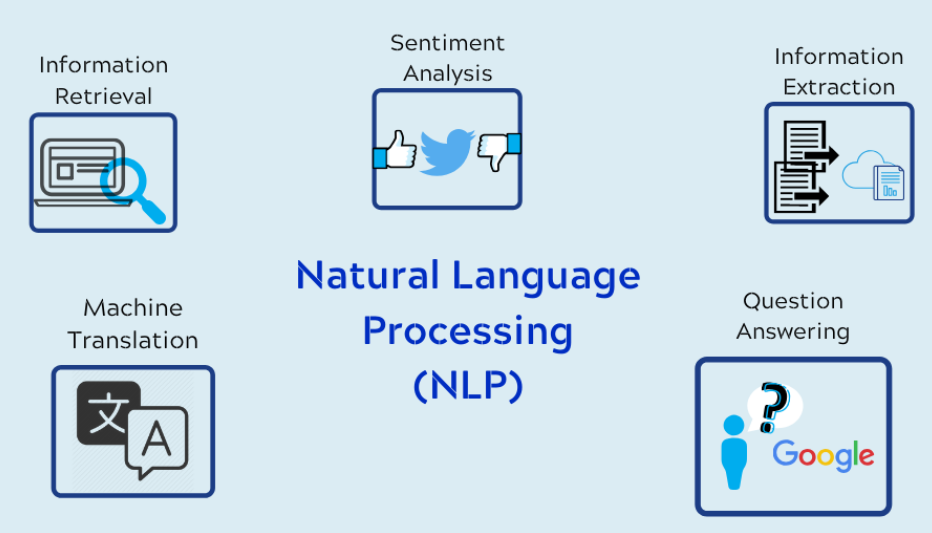

Le Traitement Automatique du Langage naturel (TAL) ou Natural Language Processing (NLP) en anglais trouve de nombreuses applications dans la vie de tous les jours:

* traduction de texte (DeepL par exemple)
* correcteur orthographique
* résumé automatique d’un contenu
* synthèse vocale
* classification de texte
* analyse d’opinion/sentiment
* prédiction du prochain mot sur smartphone
* extraction des entités nommées depuis un text

# A quoi sert le TAL ?

* traduction automatique
* correction orthographique
* extraction d’information
* simplification de textes


# Les diff´erents niveaux de la langue

* phonetique et phonologie: ´etude des sons
* morphologie: ´etude des mots
* syntaxe: ´etude de la fa¸con dont les mots sont agenc´es
* semantique: ´etude du sens
* pragmatique: ´etude de l’utilisation du langage en contexte

# Les grands principes
Le TAL est généralement composé de deux à trois grandes étapes:

* Pré-traitement : une étape qui cherche à standardiser du texte afin de rendre son usage plus facile
* Représentation du texte comme un vecteur : Cette étape peut être effectuée via des techniques de sac de mots (Bag of Words) ou Term Frequency-Inverse Document Frequency (Tf-IdF).

On peut également apprendre des représentations vectorielles (embedding) par apprentissage profond.

# Tokenisation
La tokenisation cherche à transformer un texte en une série de tokens individuels. Dans l’idée, chaque token représente un mot, et identifier des mots semble être une tâche relativement simple. Mais comment gérer en français des exemples tels que: “J’ai froid”. Il faut que le modèle de tokenisation sépare le “J’” comme étant un premier mot.

# Stemming ou Lemmatisation
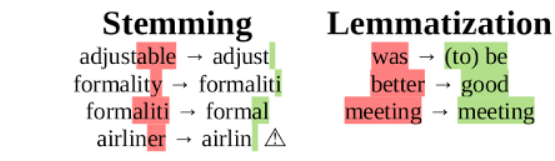

In [ ]:
import pandas as pd

In [ ]:
data = 'https://raw.githubusercontent.com/abdoulayegk/ODC-Formaton/main/Jour%20No6/Covid/Train.csv'

# Vectorization

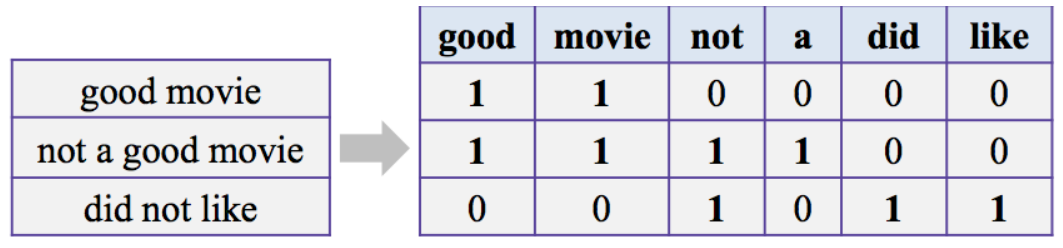

# Countvectorizer de Sklearn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "Le chat est sur le tapis.",
    "Le chien joue dans le jardin.",
    "Les oiseaux chantent dans les arbres."
]

In [ ]:
vectorizer = CountVectorizer()

corpus_cv = vectorizer.fit_transform(corpus)

In [ ]:
corpus_cv.toarray()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "Le chat est sur le tapis.",
    "Le chien joue dans le jardin.",
    "Les oiseaux chantent dans les arbres."
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())
print(X.toarray())


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Le chat est sur le tapis.",
    "Le chien joue dans le jardin.",
    "Les oiseaux chantent dans les arbres."
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())
print(X.toarray())


<a id='5.1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:140%; text-align:center; border-radius: 15px 50px;">5.1 Tunning CountVectorizer</p>

CountVectorizer has a few parameters you should know.

1. **stop_words**: Since CountVectorizer just counts the occurrences of each word in its vocabulary, extremely common words like ‘the’, ‘and’, etc. will become very important features while they add little meaning to the text. Your model can often be improved if you don’t take those words into account. Stop words are just a list of words you don’t want to use as features. You can set the parameter stop_words=’english’ to use a built-in list. Alternatively you can set stop_words equal to some custom list. This parameter defaults to None.

2. **ngram_range**: An n-gram is just a string of n words in a row. E.g. the sentence ‘I am Groot’ contains the 2-grams ‘I am’ and ‘am Groot’. The sentence is itself a 3-gram. Set the parameter ngram_range=(a,b) where a is the minimum and b is the maximum size of ngrams you want to include in your features. The default ngram_range is (1,1). In a recent project where I modeled job postings online, I found that including 2-grams as features boosted my model’s predictive power significantly. This makes intuitive sense; many job titles such as ‘data scientist’, ‘data engineer’, and ‘data analyst’ are 2 words long.

3. **min_df, max_df**: These are the minimum and maximum document frequencies words/n-grams must have to be used as features. If either of these parameters are set to integers, they will be used as bounds on the number of documents each feature must be in to be considered as a feature. If either is set to a float, that number will be interpreted as a frequency rather than a numerical limit. min_df defaults to 1 (int) and max_df defaults to 1.0 (float).

4. **max_features**: This parameter is pretty self-explanatory. The CountVectorizer will choose the words/features that occur most frequently to be in its’ vocabulary and drop everything else.

You would set these parameters when initializing your CountVectorizer object as shown below.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/abdoulayegk/ODC-Formaton/main/Jour%20No6/Covid/Train.csv")

In [ ]:
df.head()

# Technique de pretraitment avance



Avec le code ci-dessous on vas essayer de nettoyer le text en enlevant tout ce qui est:
* text = str(text).lower(): Cette ligne convertit le texte en minuscules en utilisant la fonction lower(). Cela permet de normaliser le texte et d'éviter les différences de casse lors du nettoyage.

* text = re.sub('\[.*?\]', '', text): Cette ligne utilise la fonction re.sub() du module re pour supprimer tout le texte entre crochets (c'est-à-dire le texte qui est inclus entre '[' et ']'). Les .*? dans l'expression régulière correspondent à n'importe quel caractère, de manière non gourmande, ce qui signifie qu'il correspondra au texte entre les crochets les plus proches.

* text = re.sub('https?://\S+|www\.\S+', '', text): Cette ligne supprime les liens URL et les adresses Web du texte. L'expression régulière https?://\S+ correspond à une URL qui commence par "http://" ou "https://", suivie de un ou plusieurs caractères non blancs (\S+). L'expression www\.\S+ correspond à une adresse Web commençant par "www.", suivie de un ou plusieurs caractères non blancs. Les liens et les adresses Web correspondants sont supprimés du texte.

* text = re.sub('<.*?>+', '', text): Cette ligne supprime les balises HTML et leur contenu du texte. L'expression régulière <.*?>+ correspond à tout le texte entre '<' et '>', y compris les balises elles-mêmes. Par conséquent, toutes les balises HTML sont supprimées du texte.

* text = re.sub('[%s]' % re.escape(string.punctuation), '', text): Cette ligne supprime la ponctuation du texte. Elle utilise string.punctuation du module string pour obtenir une chaîne contenant tous les caractères de ponctuation. La fonction re.escape() est utilisée pour échapper les caractères spéciaux de l'expression régulière. Ainsi, tous les caractères de ponctuation sont supprimés du texte.

* text = re.sub('\n', '', text): Cette ligne supprime les caractères de saut de ligne du texte en remplaçant les occurrences de '\n' par une chaîne vide.

* text = re.sub('\w*\d\w*', '', text): Cette ligne supprime les mots qui contiennent des chiffres. L'expression régulière \w*\d\w* correspond à un mot qui contient au moins un chiffre. Elle correspond à zéro ou plusieurs caractères alphanumériques (\w*), suivis d'un chiffre (\d), suivis de zéro ou plusieurs caractères alphanumériques (\w*). Ainsi, tous les mots contenant des chiffres sont supprimés du texte.

In [ ]:
import re # Regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['message_clean'] = df['text'].apply(clean_text)
df.head()

## Creation de pipeline

In [ ]:
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.pipeline import Pipeline
# import re

# pipe = Pipeline([('bow', CountVectorizer()),
#                  ('tfid', TfidfTransformer()),
#                  ('model', MultinomialNB())])

# # Fit the pipeline with the data
# pipe.fit(x_train, y_train)

# y_pred_class = pipe.predict(x_test)

# print(metrics.accuracy_score(y_test, y_pred_class))



In [ ]:
import pandas as pd

L'objectif de ce défi est de développer un modèle d'apprentissage automatique pour évaluer si un message Twitter concerne COVID-19 ou non. Ce modèle aidera à recueillir des données tweet sur l'épidémie sans s'appuyer uniquement sur des mots clés tels que ‘ covid ’ ou ‘ coronavirus ’ étant présent, permettant aux chercheurs et aux ingénieurs de rassembler un ensemble de données plus complet pour l'analyse des sentiments.

Ce modèle pourrait être mis en pratique dans le cadre d'un effort plus large pour comprendre le sentiment en ligne autour de COVID-19, et éclairer les communications futures et les interventions publiques des gouvernements et des organisations de santé publique non gouvernementales.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/abdoulayegk/ODC-Formaton/main/Jour%20No6/Covid/Train.csv")

In [ ]:
df.head()

In [ ]:
df['target'].value_counts().plot(kind='bar')

In [ ]:
df.text[:5]

In [ ]:
X = df.text
y = df.target

In [ ]:
X = vectorizer.fit_transform(X)

In [ ]:
X

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=2023)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

In [ ]:
from ast import mod
preds = model.predict(X_test)

In [ ]:
print("la precision total pour ce model est de: ", accuracy_score(y_test, preds))

### Pour test la performance du model avec des donnees du text:

In [ ]:
model.predict(vectorizer.transform(['Hey there are some money here so if you want we can work together']))

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
import re

pipe = Pipeline([
                # ('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

# Fit the pipeline with the data
pipe.fit(X_train, y_train)

y_pred_class = pipe.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_class))

# conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
import re

pipe = Pipeline([
                 ('bow', CountVectorizer()),
                 #('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

# Fit the pipeline with the data
pipe.fit(X_train, y_train)

y_pred_class = pipe.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_class))

# conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))